# CHURN PREDICTION IN TELECOM INDUSTRY
Customers are the most important assets of any industry and making the old customers stay and gaining new customers is a crucial role for 
the growth in a market. The customers leaving services of any company are known as churn. These churns depend on many reasons like high customer effort, ineffective marketing, or better offers from competitors.

## Table of contents

### I) Introduction
- Dataset and features
- Problem Statement

### II) EDA (Exploratory Data Analysis)
- Loading the Dataset
- Data Description and Data Cleaning
- Data Transformation
- Correlation Between Features 

### III) Modeling
- Splitting the dataset to training and test data
- Balancing of Training set
- Dimentionality Reduction
- Applying the model

### IV) Evaluation
### IV) Conclusion

# I) INTRODUCTION

## Dataset and feature

The dataset used in this paper is taken from “https://www.kaggle.com/datasets/datazng/telecom-company-churn-rate-call-center-data ”. The dataset consists of 7043 records and 21 features with ‘Churn’ as the target feature.

The features that are in the datasets taken are:

- customerID - A unique id number provided to every customer.

- gender - Male/Female

- SeniorCitizen - Whether the Customer is Senior citzen(1) or not(0).

- Partner - Whether the customer has a partner or not.

- Dependents - Whether the customer has dependents or not.

- tenure - For how much time (in months) the customer is taking the services of the company.

- PhoneService - Whether the customer has a phone service or not.

- MultipleLines - Whether the customer has multiple lines or not or no phone services.

- InternetService - Service provider like DSL, Fiber optic or other.

- OnlineSecurity - Whether the customer has online security or not or no internet service.

- OnlineBackup - Whether the customer has online backup or not or no internet service.

- DeviceProtection - Whether the customer has Device protection or not or no internet service.

- TechSupport - Whether the customer has Technical Support or not or no internet service.

- StreamingTV - Whether the customer has Streaming TV  or not or no internet service.

- StreamingMovies - Whether the customer has Streaming movies on the device or not or no internet service.

- Contract - Type and duration of the contract.
  - Month-to-month
  - One year
  - Two year

- PaperlessBilling - Whether the customer uses paperless Billing or not.

- PaymentMethod - Payment method that customer uses.
    - Mailed check
    - Electronic check
    - Credit card (Automatic)
    - Bank transfer (Automatic)

- MonthlyCharges - Monthly Charges of the customer.

- TotalCharges - Total Charges of the customer.

- Churn (Target Feature) - Whether the customer is churning (leaving) or not. 

## Problem Statement
Why the customers are leaving the services of a particular telecom industry? What are the reason behind them so that the industry can work on those points.

# II) EDA (Exploratory Data Analysis)

### Loading the Dataset

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
import sklearn.model_selection as skms
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn import metrics

In [2]:
dt=pd.read_csv(r"1.csv")
dt.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Data Description and Data Cleaning

In [3]:
dt.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [4]:
dt.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [5]:
dt.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [6]:
dt.isnull().any()

customerID          False
gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges        False
Churn               False
dtype: bool

In [7]:
dt.duplicated().any()

False

In the dataset, it is not necessary that both the categories churn and non-churn are equal, hence, finding the percentage of both the categories in form of graph.

In [8]:
def bar_graph(x, y, x_label, y_label, title):
    
    fig, ax = plt.subplots()
    plt.bar(x,y)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.yticks(fontsize=0)
    plt.ylim(top=1)

    
    for i,v in (enumerate(y)):
        ax.text(i
                ,v+0.05
                ,str(round((v*100),2))+'%'
                ,fontsize=13
                ,ha='center')
    plt.show()

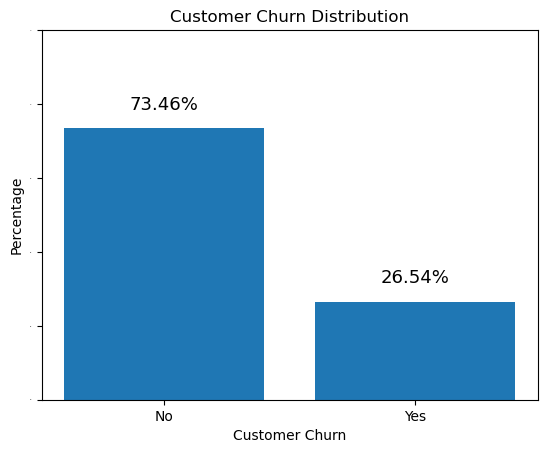

In [9]:
Churn_rate = dt['Churn'].value_counts()/ dt.shape[0]
Churn_rate.to_dict()

churn=list(Churn_rate.keys())
percentage=list(Churn_rate.values)

bar_graph(churn,percentage,"Customer Churn","Percentage", "Customer Churn Distribution")

We have seen that datatype of columns differ so a proper formatting is required for a better analysis.

## Data Transformation
Transforming the data for better analysis.
For example, mapping male as 1 and female as 0 or vice-versa and mapping 1 for the existence of a particular group and 0 for the non-existence of that group

In [10]:
def Data_transform(dataset):
    df = dataset.copy()

    df['Partner'] = df.Partner.map({'Yes':1,'No':0})
    
    df['Dependents'] = df.Dependents.map({'Yes':1,'No':0})

    df['PhoneService'] = df.PhoneService.map({'Yes':1,'No':0})
    
    df['MultipleLines'] = df.MultipleLines.map({'Yes':1,'No':0,'No phone service':0})

    df['InternetService'] = df.InternetService.map({'DSL':1,'Fiber optic':1,'No':0})
    
    df['OnlineSecurity'] = df.OnlineSecurity.map({'Yes':1,'No':0,'No internet service':0})
    
    df['OnlineBackup'] = df.OnlineBackup.map({'Yes':1,'No':0,'No internet service':0})
    
    df['DeviceProtection'] = df.DeviceProtection.map({'Yes':1,'No':0,'No internet service':0})
    
    df['TechSupport'] = df.TechSupport.map({'Yes':1,'No':0,'No internet service':0})
    
    df['StreamingTV'] = df.StreamingTV.map({'Yes':1,'No':0,'No internet service':0})
    
    df['StreamingMovies'] = df.StreamingMovies.map({'Yes':1,'No':0,'No internet service':0})
    
    df['PaperlessBilling'] = df.PaperlessBilling.map({'Yes':1,'No':0})
    
    df['Churn'] = df.Churn.map({'Yes':1,'No':0})
    
    df['Contract'] = df.Contract.map({'One year':1,'Two year':1,'Month-to-month':0})
    
    df['PaymentMethod'] = df.PaymentMethod.map({'Bank transfer (automatic)':1,'Credit card (automatic)':1,'Electronic check':0,'Mailed check':0})
    
    df.loc[df['TotalCharges']==' ','TotalCharges'] = np.nan
    
    df['TotalCharges'] = df['TotalCharges'].astype('float64')    
    
    df.loc[df['TotalCharges'].isnull()==True,'TotalCharges'] = df['MonthlyCharges'] * df['tenure']

    return df

In [11]:
df=Data_transform(dt)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,1,0,1,0,0,1,0,...,0,0,0,0,0,1,0,29.85,29.85,0
1,5575-GNVDE,Male,0,0,0,34,1,0,1,1,...,1,0,0,0,1,0,0,56.95,1889.50,0
2,3668-QPYBK,Male,0,0,0,2,1,0,1,1,...,0,0,0,0,0,1,0,53.85,108.15,1
3,7795-CFOCW,Male,0,0,0,45,0,0,1,1,...,1,1,0,0,1,0,1,42.30,1840.75,0
4,9237-HQITU,Female,0,0,0,2,1,0,1,0,...,0,0,0,0,0,1,0,70.70,151.65,1


### Correlation Matrix

In [12]:
def heatmap_graph(corr, chart_title, mask_uppertri=False ):
    mask = np.zeros_like(corr)
    mask[np.triu_indices_from(mask)] = mask_uppertri

    fig,ax = plt.subplots(figsize=(12,12))
    sns.heatmap(corr
                , mask = mask
                , square = True
                , annot = True
                , annot_kws={'size': 7, 'weight' : 'bold'}
                , cmap=plt.get_cmap("Blues")
                , linewidths=.1)
    plt.title(chart_title, fontsize=14)
    plt.show()

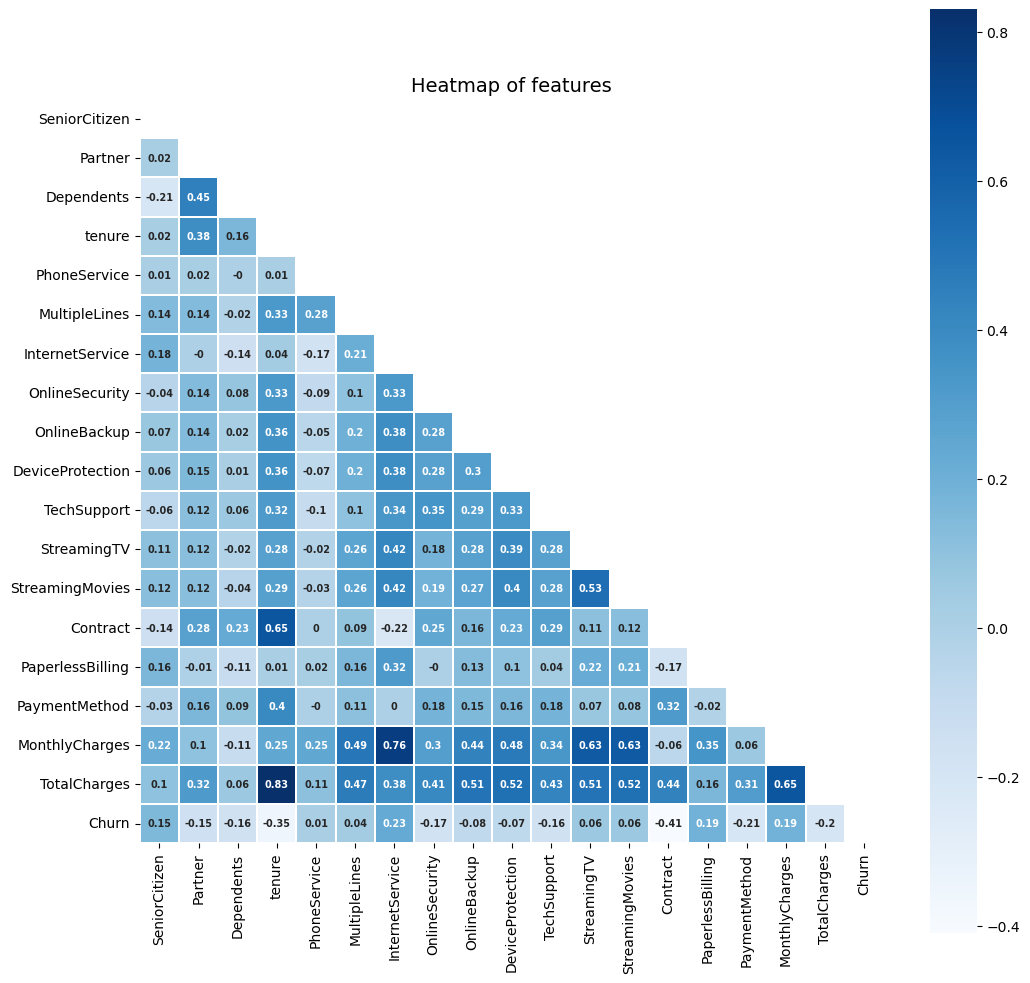

In [13]:
var_corr = round(df.iloc[:, 2:21].corr(),2)
heatmap_graph(var_corr
                       ,chart_title = 'Heatmap of features'
                       ,mask_uppertri = True)

From the correlation matrix, we can see that pair of features like tenure and TotalCharges, tenure and Contract, InternetService and MonthlyCharges, MonthlyCharges and TotalCharges are highly correlated.

# III) MODELLING
Now, the dataset is all prepared to be analysed for the prediction of Churn.

### Splitting the dataset to training and test data


In [14]:
X = df.iloc[:, 2:20].values
y = pd.get_dummies(df['Churn'],dtype=int).values
 

In [15]:
X_train,X_test,y_train,y_test=skms.train_test_split(X,y,test_size=0.30,random_state=24)

### Balancing of Training set
While training a dataset if the classes are unequal in count then it can lead to biased training of the model and the performance of the model can be reduced.

C:\Users\bisht\AppData\Local\Temp\ipykernel_23196\1505100935.py:4: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  Churn_rate = pd.value_counts(y_bar)/ len(y_bar)


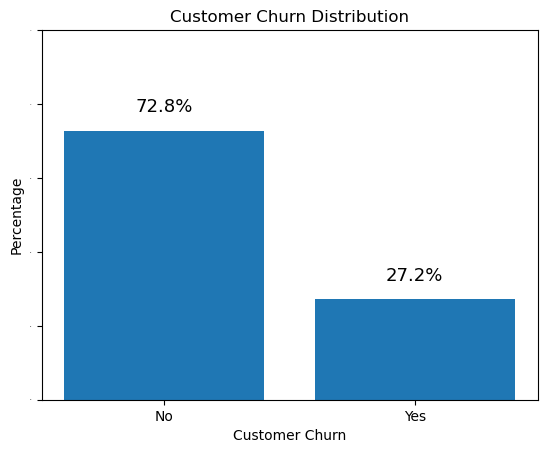

In [16]:
y_bar=pd.DataFrame(y_train)
y_bar=y_bar.idxmax(axis=1)

Churn_rate = pd.value_counts(y_bar)/ len(y_bar) 
Churn_rate.to_dict()
churn=["No","Yes"] 
percentage=list(Churn_rate.values)

bar_graph(churn,percentage,"Customer Churn","Percentage", "Customer Churn Distribution")

Here, we can see that both the classes are unequal by a huge ratio, hence, balancing of the training dataset is required.

In [17]:
st=SMOTE()
X_train_sam,y_train_sam = st.fit_resample(X_train, y_train)

C:\Users\bisht\AppData\Local\Temp\ipykernel_23196\1289360487.py:4: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  Churn_rate = pd.value_counts(y_bar[0])/ len(y_bar[0])


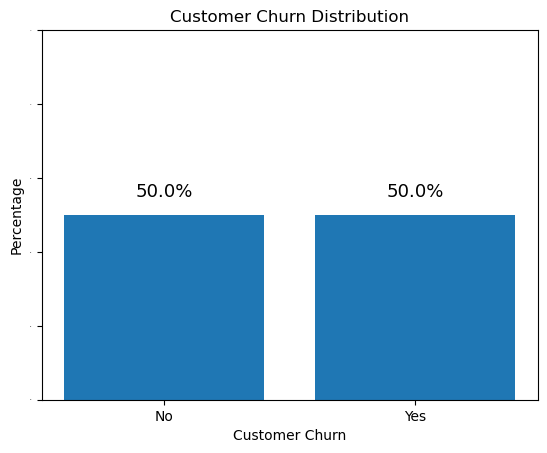

In [18]:
y_bar=pd.DataFrame(y_train_sam)
y_bar[0]

Churn_rate = pd.value_counts(y_bar[0])/ len(y_bar[0]) 
Churn_rate.to_dict()
churn=["No","Yes"] 
percentage=list(Churn_rate.values)

bar_graph(churn,percentage,"Customer Churn","Percentage", "Customer Churn Distribution")

### Dimentionality Reduction
Now, Reducing the number of features can leading to reduction of complexity of the model while improvingthe performance of the model.

In [19]:
def dim_reduction(X_train,X_test):
    sc = MinMaxScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)
    
    pca = PCA(0.95)
    X_train_pca= pca.fit_transform(X_train)
    X_test_pca= pca.transform(X_test)
    
    return X_train_pca,X_test_pca

In [20]:
X_train,X_test=dim_reduction(X_train_sam,X_test)

### Applying the model
We have a lot of hyperparameter while building a model which one can update to increase the accuracy of the model.

Therefore, we have done hyper parameter tuning while applying the model i.e., Multi-Layered Perceptron (MLP). 

In [21]:
grid = {
    'hidden_layer_sizes': [(50,), (100,),(50, 50), (100, 100)],
    'learning_rate': ['constant', 'invscaling', 'adaptive'],
    'alpha': [0.0001, 0.001, 0.01],
    'activation': ['relu', 'tanh', 'logistic']
}

In [22]:
mlp = MLPClassifier(max_iter=1000, shuffle=True)

In [23]:
GridSearch = GridSearchCV(mlp, grid, cv=5, verbose=3,scoring='accuracy')
GridSearch.fit(X_train, y_train_sam)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate=constant;, score=0.701 total time=  27.7s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate=constant;, score=0.714 total time=  16.1s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate=constant;, score=0.860 total time=  21.0s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate=constant;, score=0.852 total time=  33.5s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate=constant;, score=0.876 total time=  19.0s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate=invscaling;, score=0.681 total time=  27.4s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate=invscaling;, score=0.733 total time=  30.8s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate=invscaling;, score=0.864 total time=  29.7s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate=invscaling;, score=0.856 total time=  48.5s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate=invscaling;, score=0.875 total time=  29.6s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate=adaptive;, score=0.687 total time=  29.7s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate=adaptive;, score=0.732 total time=  31.0s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate=adaptive;, score=0.877 total time=  23.6s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate=adaptive;, score=0.863 total time=  31.5s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate=adaptive;, score=0.875 total time=  25.1s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=constant;, score=0.692 total time=  31.6s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=constant;, score=0.717 total time=  32.9s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=constant;, score=0.872 total time=  28.7s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=constant;, score=0.869 total time=  30.3s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=constant;, score=0.882 total time=  30.3s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=invscaling;, score=0.702 total time=  37.0s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=invscaling;, score=0.735 total time=  29.8s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=invscaling;, score=0.875 total time=  50.8s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=invscaling;, score=0.877 total time=  38.9s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=invscaling;, score=0.887 total time=  38.9s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=adaptive;, score=0.695 total time=  40.9s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=adaptive;, score=0.728 total time=  29.9s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=adaptive;, score=0.882 total time=  34.6s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=adaptive;, score=0.875 total time=  37.1s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=adaptive;, score=0.884 total time=  38.0s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate=constant;, score=0.686 total time=  24.9s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate=constant;, score=0.701 total time=  18.9s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate=constant;, score=0.870 total time=  19.5s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate=constant;, score=0.877 total time=  21.4s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate=constant;, score=0.876 total time=  30.2s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate=invscaling;, score=0.671 total time=  34.2s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate=invscaling;, score=0.713 total time=  22.9s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate=invscaling;, score=0.872 total time=  33.7s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate=invscaling;, score=0.885 total time=  25.9s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate=invscaling;, score=0.876 total time=  32.9s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate=adaptive;, score=0.678 total time=  22.3s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate=adaptive;, score=0.714 total time=  31.2s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate=adaptive;, score=0.870 total time=  27.8s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate=adaptive;, score=0.872 total time=  37.2s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate=adaptive;, score=0.889 total time=  31.0s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 100), learning_rate=constant;, score=0.696 total time=  26.8s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 100), learning_rate=constant;, score=0.696 total time=  38.6s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 100), learning_rate=constant;, score=0.907 total time=  32.0s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 100), learning_rate=constant;, score=0.876 total time=  28.0s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 100), learning_rate=constant;, score=0.891 total time=  36.9s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 100), learning_rate=invscaling;, score=0.700 total time=  23.8s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 100), learning_rate=invscaling;, score=0.703 total time=  38.9s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 100), learning_rate=invscaling;, score=0.889 total time=  27.7s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 100), learning_rate=invscaling;, score=0.887 total time=  41.7s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 100), learning_rate=invscaling;, score=0.880 total time=  55.7s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 100), learning_rate=adaptive;, score=0.636 total time=  41.2s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 100), learning_rate=adaptive;, score=0.716 total time=  32.0s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 100), learning_rate=adaptive;, score=0.887 total time=  33.8s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 100), learning_rate=adaptive;, score=0.873 total time=  17.0s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 100), learning_rate=adaptive;, score=0.879 total time=  28.9s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(50,), learning_rate=constant;, score=0.682 total time=  34.4s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(50,), learning_rate=constant;, score=0.731 total time=  43.9s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(50,), learning_rate=constant;, score=0.873 total time=  32.4s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(50,), learning_rate=constant;, score=0.847 total time=  23.7s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(50,), learning_rate=constant;, score=0.877 total time=  39.0s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(50,), learning_rate=invscaling;, score=0.694 total time=  30.7s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(50,), learning_rate=invscaling;, score=0.728 total time=  23.6s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(50,), learning_rate=invscaling;, score=0.856 total time=  20.4s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(50,), learning_rate=invscaling;, score=0.857 total time=  26.2s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(50,), learning_rate=invscaling;, score=0.872 total time=  22.9s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(50,), learning_rate=adaptive;, score=0.703 total time=  23.7s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(50,), learning_rate=adaptive;, score=0.735 total time=  24.7s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(50,), learning_rate=adaptive;, score=0.872 total time=  29.1s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(50,), learning_rate=adaptive;, score=0.863 total time=  26.7s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(50,), learning_rate=adaptive;, score=0.870 total time=  35.9s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(100,), learning_rate=constant;, score=0.694 total time=  25.1s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(100,), learning_rate=constant;, score=0.708 total time=  49.6s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(100,), learning_rate=constant;, score=0.883 total time=  33.1s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(100,), learning_rate=constant;, score=0.869 total time=  39.8s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(100,), learning_rate=constant;, score=0.888 total time=  21.7s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(100,), learning_rate=invscaling;, score=0.680 total time=  29.9s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(100,), learning_rate=invscaling;, score=0.742 total time=  38.4s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(100,), learning_rate=invscaling;, score=0.861 total time=  27.0s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(100,), learning_rate=invscaling;, score=0.880 total time=  36.4s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(100,), learning_rate=invscaling;, score=0.883 total time=  41.3s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(100,), learning_rate=adaptive;, score=0.689 total time=  34.9s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(100,), learning_rate=adaptive;, score=0.728 total time=  36.5s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(100,), learning_rate=adaptive;, score=0.886 total time=  42.4s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(100,), learning_rate=adaptive;, score=0.874 total time=  32.7s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(100,), learning_rate=adaptive;, score=0.887 total time=  27.2s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(50, 50), learning_rate=constant;, score=0.678 total time=  21.9s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(50, 50), learning_rate=constant;, score=0.721 total time=  33.4s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(50, 50), learning_rate=constant;, score=0.873 total time=  37.1s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(50, 50), learning_rate=constant;, score=0.883 total time=  34.7s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(50, 50), learning_rate=constant;, score=0.858 total time=  28.8s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(50, 50), learning_rate=invscaling;, score=0.670 total time=  21.9s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(50, 50), learning_rate=invscaling;, score=0.735 total time=  23.5s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(50, 50), learning_rate=invscaling;, score=0.893 total time=  38.1s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(50, 50), learning_rate=invscaling;, score=0.868 total time=  36.7s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(50, 50), learning_rate=invscaling;, score=0.884 total time=  21.9s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(50, 50), learning_rate=adaptive;, score=0.675 total time=  29.2s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(50, 50), learning_rate=adaptive;, score=0.694 total time=  25.6s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(50, 50), learning_rate=adaptive;, score=0.865 total time=  26.2s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(50, 50), learning_rate=adaptive;, score=0.862 total time=  29.4s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(50, 50), learning_rate=adaptive;, score=0.866 total time=  23.4s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(100, 100), learning_rate=constant;, score=0.685 total time=  28.4s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(100, 100), learning_rate=constant;, score=0.721 total time=  31.9s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(100, 100), learning_rate=constant;, score=0.895 total time=  32.8s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(100, 100), learning_rate=constant;, score=0.884 total time=  35.6s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(100, 100), learning_rate=constant;, score=0.889 total time=  34.8s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(100, 100), learning_rate=invscaling;, score=0.694 total time=  33.6s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(100, 100), learning_rate=invscaling;, score=0.698 total time=  31.8s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(100, 100), learning_rate=invscaling;, score=0.880 total time=  31.7s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(100, 100), learning_rate=invscaling;, score=0.891 total time=  35.8s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(100, 100), learning_rate=invscaling;, score=0.869 total time=  41.6s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(100, 100), learning_rate=adaptive;, score=0.682 total time=  30.8s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(100, 100), learning_rate=adaptive;, score=0.705 total time=  24.9s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(100, 100), learning_rate=adaptive;, score=0.878 total time=  47.9s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(100, 100), learning_rate=adaptive;, score=0.877 total time=  39.1s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(100, 100), learning_rate=adaptive;, score=0.869 total time=  34.5s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(50,), learning_rate=constant;, score=0.700 total time=  21.4s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(50,), learning_rate=constant;, score=0.714 total time=  33.6s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(50,), learning_rate=constant;, score=0.866 total time=  30.6s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(50,), learning_rate=constant;, score=0.854 total time=  30.1s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(50,), learning_rate=constant;, score=0.870 total time=  24.3s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(50,), learning_rate=invscaling;, score=0.700 total time=  31.3s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(50,), learning_rate=invscaling;, score=0.729 total time=  27.5s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(50,), learning_rate=invscaling;, score=0.853 total time=  30.9s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(50,), learning_rate=invscaling;, score=0.863 total time=  19.5s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(50,), learning_rate=invscaling;, score=0.861 total time=  22.8s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(50,), learning_rate=adaptive;, score=0.706 total time=  21.6s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(50,), learning_rate=adaptive;, score=0.728 total time=  17.8s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(50,), learning_rate=adaptive;, score=0.858 total time=  21.0s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(50,), learning_rate=adaptive;, score=0.859 total time=  32.5s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(50,), learning_rate=adaptive;, score=0.884 total time=  19.3s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(100,), learning_rate=constant;, score=0.694 total time=  30.8s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(100,), learning_rate=constant;, score=0.719 total time=  29.5s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(100,), learning_rate=constant;, score=0.892 total time=  28.3s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(100,), learning_rate=constant;, score=0.872 total time=  27.3s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(100,), learning_rate=constant;, score=0.886 total time=  21.9s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(100,), learning_rate=invscaling;, score=0.695 total time=  38.4s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(100,), learning_rate=invscaling;, score=0.710 total time=  26.8s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(100,), learning_rate=invscaling;, score=0.875 total time=  37.6s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(100,), learning_rate=invscaling;, score=0.871 total time=  35.4s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(100,), learning_rate=invscaling;, score=0.889 total time=  34.0s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(100,), learning_rate=adaptive;, score=0.685 total time=  38.4s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(100,), learning_rate=adaptive;, score=0.726 total time=  37.7s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(100,), learning_rate=adaptive;, score=0.879 total time=  31.9s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(100,), learning_rate=adaptive;, score=0.881 total time=  39.7s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(100,), learning_rate=adaptive;, score=0.888 total time=  37.6s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(50, 50), learning_rate=constant;, score=0.668 total time=  16.6s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(50, 50), learning_rate=constant;, score=0.739 total time=  18.6s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(50, 50), learning_rate=constant;, score=0.871 total time=  27.1s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(50, 50), learning_rate=constant;, score=0.866 total time=  19.8s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(50, 50), learning_rate=constant;, score=0.889 total time=  28.0s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(50, 50), learning_rate=invscaling;, score=0.694 total time=  34.7s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(50, 50), learning_rate=invscaling;, score=0.711 total time=  21.2s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(50, 50), learning_rate=invscaling;, score=0.872 total time=  26.0s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(50, 50), learning_rate=invscaling;, score=0.849 total time=  20.2s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(50, 50), learning_rate=invscaling;, score=0.897 total time=  27.9s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(50, 50), learning_rate=adaptive;, score=0.684 total time=  14.1s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(50, 50), learning_rate=adaptive;, score=0.708 total time=  21.0s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(50, 50), learning_rate=adaptive;, score=0.873 total time=  31.3s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(50, 50), learning_rate=adaptive;, score=0.875 total time=  33.9s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(50, 50), learning_rate=adaptive;, score=0.889 total time=  21.6s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 100), learning_rate=constant;, score=0.665 total time=  32.3s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 100), learning_rate=constant;, score=0.705 total time=  31.4s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 100), learning_rate=constant;, score=0.886 total time=  31.1s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 100), learning_rate=constant;, score=0.884 total time=  38.3s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 100), learning_rate=constant;, score=0.875 total time=  40.8s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 100), learning_rate=invscaling;, score=0.672 total time=  22.8s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 100), learning_rate=invscaling;, score=0.719 total time=  33.5s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 100), learning_rate=invscaling;, score=0.884 total time=  28.7s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 100), learning_rate=invscaling;, score=0.849 total time=  19.3s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 100), learning_rate=invscaling;, score=0.886 total time=  31.8s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 100), learning_rate=adaptive;, score=0.676 total time=  24.0s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 100), learning_rate=adaptive;, score=0.735 total time=  37.9s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 100), learning_rate=adaptive;, score=0.889 total time=  58.8s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 100), learning_rate=adaptive;, score=0.882 total time=  32.1s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 100), learning_rate=adaptive;, score=0.900 total time=  39.0s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate=constant;, score=0.698 total time=  58.5s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate=constant;, score=0.717 total time=  58.2s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate=constant;, score=0.854 total time=  51.2s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate=constant;, score=0.851 total time=  42.7s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate=constant;, score=0.863 total time=  48.3s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate=invscaling;, score=0.687 total time=  43.6s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate=invscaling;, score=0.714 total time=  49.1s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate=invscaling;, score=0.860 total time=  49.1s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate=invscaling;, score=0.854 total time=  52.0s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate=invscaling;, score=0.875 total time=  44.7s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate=adaptive;, score=0.691 total time=  34.1s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate=adaptive;, score=0.725 total time=  38.4s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate=adaptive;, score=0.868 total time=  37.1s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate=adaptive;, score=0.855 total time=  34.7s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate=adaptive;, score=0.876 total time=  37.0s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=constant;, score=0.679 total time=  52.3s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=constant;, score=0.731 total time=  52.5s
[CV 3/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=constant;, score=0.871 total time=  52.3s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=constant;, score=0.859 total time=  58.2s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=constant;, score=0.866 total time=  59.8s
[CV 1/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=invscaling;, score=0.688 total time=  43.2s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=invscaling;, score=0.721 total time=  49.8s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=invscaling;, score=0.860 total time=  54.5s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=invscaling;, score=0.863 total time=  56.5s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=invscaling;, score=0.866 total time=  54.6s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=adaptive;, score=0.684 total time=  58.6s
[CV 2/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=adaptive;, score=0.704 total time=  58.6s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=adaptive;, score=0.873 total time=  59.4s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=adaptive;, score=0.862 total time=  58.8s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=adaptive;, score=0.871 total time=  55.8s
[CV 1/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate=constant;, score=0.690 total time=  57.6s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate=constant;, score=0.740 total time=  51.0s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate=constant;, score=0.871 total time=  53.5s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate=constant;, score=0.856 total time=  59.6s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate=constant;, score=0.868 total time=  59.3s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate=invscaling;, score=0.680 total time= 1.1min


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate=invscaling;, score=0.725 total time=  49.9s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate=invscaling;, score=0.871 total time= 1.2min


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate=invscaling;, score=0.857 total time=  54.6s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate=invscaling;, score=0.861 total time=  56.4s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate=adaptive;, score=0.697 total time=  48.1s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate=adaptive;, score=0.721 total time=  56.9s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate=adaptive;, score=0.873 total time=  43.7s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate=adaptive;, score=0.858 total time=  54.0s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate=adaptive;, score=0.864 total time=  50.8s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 100), learning_rate=constant;, score=0.707 total time=  56.7s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 100), learning_rate=constant;, score=0.724 total time= 1.0min


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 100), learning_rate=constant;, score=0.878 total time= 1.3min


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 100), learning_rate=constant;, score=0.858 total time= 1.4min


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 100), learning_rate=constant;, score=0.861 total time= 1.4min


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 100), learning_rate=invscaling;, score=0.698 total time= 1.5min


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 100), learning_rate=invscaling;, score=0.749 total time= 1.3min


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 100), learning_rate=invscaling;, score=0.884 total time= 1.8min


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 100), learning_rate=invscaling;, score=0.866 total time= 1.7min


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 100), learning_rate=invscaling;, score=0.869 total time= 1.5min


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 100), learning_rate=adaptive;, score=0.681 total time= 1.5min


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 100), learning_rate=adaptive;, score=0.735 total time= 1.1min


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 100), learning_rate=adaptive;, score=0.877 total time= 1.5min


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 100), learning_rate=adaptive;, score=0.872 total time= 1.3min


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 100), learning_rate=adaptive;, score=0.865 total time=  53.6s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50,), learning_rate=constant;, score=0.688 total time=  43.1s
[CV 2/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50,), learning_rate=constant;, score=0.720 total time=  37.4s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50,), learning_rate=constant;, score=0.866 total time=  40.5s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50,), learning_rate=constant;, score=0.850 total time=  37.4s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50,), learning_rate=constant;, score=0.870 total time=  32.2s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50,), learning_rate=invscaling;, score=0.706 total time=  31.8s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50,), learning_rate=invscaling;, score=0.715 total time=  35.2s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50,), learning_rate=invscaling;, score=0.857 total time=  37.8s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50,), learning_rate=invscaling;, score=0.853 total time=  35.3s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50,), learning_rate=invscaling;, score=0.861 total time=  35.1s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50,), learning_rate=adaptive;, score=0.706 total time=  33.5s
[CV 2/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50,), learning_rate=adaptive;, score=0.719 total time=  31.1s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50,), learning_rate=adaptive;, score=0.861 total time=  34.8s
[CV 4/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50,), learning_rate=adaptive;, score=0.855 total time=  34.7s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50,), learning_rate=adaptive;, score=0.865 total time=  28.5s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100,), learning_rate=constant;, score=0.698 total time=  45.0s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100,), learning_rate=constant;, score=0.721 total time=  53.0s
[CV 3/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100,), learning_rate=constant;, score=0.869 total time=  53.6s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100,), learning_rate=constant;, score=0.868 total time=  52.3s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100,), learning_rate=constant;, score=0.873 total time=  49.4s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100,), learning_rate=invscaling;, score=0.701 total time=  51.8s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100,), learning_rate=invscaling;, score=0.713 total time=  51.0s
[CV 3/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100,), learning_rate=invscaling;, score=0.861 total time=  47.5s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100,), learning_rate=invscaling;, score=0.856 total time=  50.7s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100,), learning_rate=invscaling;, score=0.889 total time=  47.0s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100,), learning_rate=adaptive;, score=0.694 total time=  47.6s
[CV 2/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100,), learning_rate=adaptive;, score=0.725 total time=  39.3s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100,), learning_rate=adaptive;, score=0.882 total time=  50.1s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100,), learning_rate=adaptive;, score=0.863 total time=  50.5s
[CV 5/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100,), learning_rate=adaptive;, score=0.866 total time=  49.0s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50, 50), learning_rate=constant;, score=0.703 total time=  39.3s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50, 50), learning_rate=constant;, score=0.744 total time=  35.8s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50, 50), learning_rate=constant;, score=0.876 total time=  44.1s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50, 50), learning_rate=constant;, score=0.861 total time=  51.2s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50, 50), learning_rate=constant;, score=0.875 total time=  50.7s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50, 50), learning_rate=invscaling;, score=0.694 total time=  46.8s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50, 50), learning_rate=invscaling;, score=0.722 total time=  44.6s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50, 50), learning_rate=invscaling;, score=0.863 total time=  46.8s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50, 50), learning_rate=invscaling;, score=0.854 total time=  49.5s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50, 50), learning_rate=invscaling;, score=0.864 total time=  49.2s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50, 50), learning_rate=adaptive;, score=0.720 total time=  35.8s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50, 50), learning_rate=adaptive;, score=0.720 total time=  42.9s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50, 50), learning_rate=adaptive;, score=0.861 total time=  48.0s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50, 50), learning_rate=adaptive;, score=0.859 total time=  50.2s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50, 50), learning_rate=adaptive;, score=0.873 total time=  40.6s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100, 100), learning_rate=constant;, score=0.687 total time= 1.3min


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100, 100), learning_rate=constant;, score=0.731 total time= 1.0min


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100, 100), learning_rate=constant;, score=0.877 total time= 1.3min


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100, 100), learning_rate=constant;, score=0.867 total time= 1.2min


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100, 100), learning_rate=constant;, score=0.875 total time= 1.2min


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100, 100), learning_rate=invscaling;, score=0.687 total time=  50.3s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100, 100), learning_rate=invscaling;, score=0.743 total time= 1.1min


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100, 100), learning_rate=invscaling;, score=0.876 total time= 1.3min


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100, 100), learning_rate=invscaling;, score=0.852 total time=  54.0s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100, 100), learning_rate=invscaling;, score=0.864 total time= 1.1min


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100, 100), learning_rate=adaptive;, score=0.694 total time= 1.0min


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100, 100), learning_rate=adaptive;, score=0.748 total time=  50.0s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100, 100), learning_rate=adaptive;, score=0.874 total time= 1.1min


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100, 100), learning_rate=adaptive;, score=0.863 total time= 1.1min


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100, 100), learning_rate=adaptive;, score=0.864 total time=  58.0s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50,), learning_rate=constant;, score=0.694 total time=  27.9s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50,), learning_rate=constant;, score=0.737 total time=  30.9s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50,), learning_rate=constant;, score=0.852 total time=  36.3s
[CV 4/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50,), learning_rate=constant;, score=0.852 total time=  31.4s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50,), learning_rate=constant;, score=0.873 total time=  31.3s
[CV 1/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50,), learning_rate=invscaling;, score=0.699 total time=  27.1s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50,), learning_rate=invscaling;, score=0.728 total time=  28.6s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50,), learning_rate=invscaling;, score=0.872 total time=  32.2s
[CV 4/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50,), learning_rate=invscaling;, score=0.857 total time=  29.1s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50,), learning_rate=invscaling;, score=0.874 total time=  29.4s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50,), learning_rate=adaptive;, score=0.703 total time=  29.5s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50,), learning_rate=adaptive;, score=0.729 total time=  26.0s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50,), learning_rate=adaptive;, score=0.858 total time=  26.7s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50,), learning_rate=adaptive;, score=0.841 total time=  25.5s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50,), learning_rate=adaptive;, score=0.866 total time=  32.5s
[CV 1/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100,), learning_rate=constant;, score=0.698 total time=  41.1s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100,), learning_rate=constant;, score=0.725 total time=  44.6s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100,), learning_rate=constant;, score=0.861 total time=  40.1s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100,), learning_rate=constant;, score=0.864 total time=  46.5s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100,), learning_rate=constant;, score=0.879 total time=  46.1s
[CV 1/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100,), learning_rate=invscaling;, score=0.708 total time=  36.6s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100,), learning_rate=invscaling;, score=0.735 total time=  48.7s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100,), learning_rate=invscaling;, score=0.860 total time=  46.8s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100,), learning_rate=invscaling;, score=0.868 total time=  48.1s
[CV 5/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100,), learning_rate=invscaling;, score=0.867 total time=  40.0s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100,), learning_rate=adaptive;, score=0.696 total time=  47.5s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100,), learning_rate=adaptive;, score=0.737 total time=  49.1s
[CV 3/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100,), learning_rate=adaptive;, score=0.869 total time=  44.8s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100,), learning_rate=adaptive;, score=0.854 total time=  53.8s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100,), learning_rate=adaptive;, score=0.873 total time=  48.0s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50, 50), learning_rate=constant;, score=0.708 total time=  31.0s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50, 50), learning_rate=constant;, score=0.710 total time=  32.0s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50, 50), learning_rate=constant;, score=0.872 total time=  45.3s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50, 50), learning_rate=constant;, score=0.870 total time=  36.9s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50, 50), learning_rate=constant;, score=0.886 total time=  49.0s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50, 50), learning_rate=invscaling;, score=0.643 total time=  53.3s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50, 50), learning_rate=invscaling;, score=0.731 total time=  46.2s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50, 50), learning_rate=invscaling;, score=0.870 total time=  42.4s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50, 50), learning_rate=invscaling;, score=0.861 total time=  48.9s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50, 50), learning_rate=invscaling;, score=0.868 total time=  47.9s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50, 50), learning_rate=adaptive;, score=0.709 total time=  41.7s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50, 50), learning_rate=adaptive;, score=0.728 total time=  41.7s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50, 50), learning_rate=adaptive;, score=0.868 total time=  50.7s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50, 50), learning_rate=adaptive;, score=0.849 total time=  42.4s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50, 50), learning_rate=adaptive;, score=0.867 total time= 1.1min


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100, 100), learning_rate=constant;, score=0.700 total time=  44.7s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100, 100), learning_rate=constant;, score=0.724 total time=  49.9s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100, 100), learning_rate=constant;, score=0.880 total time= 1.2min


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100, 100), learning_rate=constant;, score=0.866 total time= 1.2min


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100, 100), learning_rate=constant;, score=0.867 total time= 1.0min


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100, 100), learning_rate=invscaling;, score=0.702 total time=  55.5s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100, 100), learning_rate=invscaling;, score=0.740 total time= 1.1min


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100, 100), learning_rate=invscaling;, score=0.876 total time= 1.2min


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100, 100), learning_rate=invscaling;, score=0.847 total time=  53.1s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100, 100), learning_rate=invscaling;, score=0.882 total time= 1.1min


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100, 100), learning_rate=adaptive;, score=0.678 total time= 1.0min


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100, 100), learning_rate=adaptive;, score=0.742 total time= 1.2min


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100, 100), learning_rate=adaptive;, score=0.862 total time=  55.8s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100, 100), learning_rate=adaptive;, score=0.864 total time= 1.1min


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100, 100), learning_rate=adaptive;, score=0.868 total time= 1.1min


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate=constant;, score=0.744 total time=   1.5s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate=constant;, score=0.754 total time=   1.3s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate=constant;, score=0.745 total time=   1.4s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate=constant;, score=0.753 total time=   1.2s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate=constant;, score=0.771 total time=   1.1s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate=invscaling;, score=0.744 total time=   1.3s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate=invscaling;, score=0.755 total time=   1.3s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate=invscaling;, score=0.745 total time=   1.2s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate=invscaling;, score=0.753 total time=   1.0s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate=invscaling;, score=0.771 total time=   1.0s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate=adaptive;, score=0.744 total time=   1.4s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate=adaptive;, score=0.754 total time=   1.3s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate=adaptive;, score=0.744 total time=   1.0s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate=adaptive;, score=0.752 total time=   1.0s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate=adaptive;, score=0.771 total time=   1.1s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=constant;, score=0.744 total time=   1.8s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=constant;, score=0.755 total time=   1.5s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=constant;, score=0.744 total time=   1.7s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=constant;, score=0.755 total time=   1.7s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=constant;, score=0.769 total time=   1.4s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=invscaling;, score=0.747 total time=   1.6s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=invscaling;, score=0.755 total time=   1.7s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=invscaling;, score=0.746 total time=   1.4s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=invscaling;, score=0.753 total time=   1.5s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=invscaling;, score=0.769 total time=   1.4s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=adaptive;, score=0.742 total time=   1.5s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=adaptive;, score=0.755 total time=   1.6s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=adaptive;, score=0.745 total time=   1.4s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=adaptive;, score=0.751 total time=   1.5s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=adaptive;, score=0.770 total time=   1.8s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate=constant;, score=0.744 total time=   5.6s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate=constant;, score=0.756 total time=   3.4s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate=constant;, score=0.744 total time=   1.7s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate=constant;, score=0.755 total time=   2.4s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate=constant;, score=0.772 total time=   2.9s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate=invscaling;, score=0.747 total time=   3.6s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate=invscaling;, score=0.753 total time=   3.6s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate=invscaling;, score=0.749 total time=   3.1s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate=invscaling;, score=0.753 total time=   2.4s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate=invscaling;, score=0.771 total time=   2.4s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate=adaptive;, score=0.747 total time=  10.7s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate=adaptive;, score=0.757 total time=   3.6s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate=adaptive;, score=0.750 total time=   2.0s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate=adaptive;, score=0.755 total time=   2.0s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate=adaptive;, score=0.774 total time=   2.1s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 100), learning_rate=constant;, score=0.745 total time=   3.1s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 100), learning_rate=constant;, score=0.754 total time=   4.9s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 100), learning_rate=constant;, score=0.749 total time=   3.6s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 100), learning_rate=constant;, score=0.754 total time=   2.2s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 100), learning_rate=constant;, score=0.769 total time=   4.1s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 100), learning_rate=invscaling;, score=0.744 total time=   5.3s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 100), learning_rate=invscaling;, score=0.753 total time=   4.1s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 100), learning_rate=invscaling;, score=0.749 total time=   3.8s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 100), learning_rate=invscaling;, score=0.753 total time=   3.8s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 100), learning_rate=invscaling;, score=0.769 total time=   2.6s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 100), learning_rate=adaptive;, score=0.742 total time=   2.9s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 100), learning_rate=adaptive;, score=0.754 total time=   2.4s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 100), learning_rate=adaptive;, score=0.749 total time=   2.5s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 100), learning_rate=adaptive;, score=0.753 total time=   2.9s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 100), learning_rate=adaptive;, score=0.769 total time=   3.1s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(50,), learning_rate=constant;, score=0.744 total time=   1.6s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(50,), learning_rate=constant;, score=0.755 total time=   1.5s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(50,), learning_rate=constant;, score=0.746 total time=   1.5s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(50,), learning_rate=constant;, score=0.753 total time=   1.3s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(50,), learning_rate=constant;, score=0.771 total time=   1.4s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(50,), learning_rate=invscaling;, score=0.742 total time=   1.2s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(50,), learning_rate=invscaling;, score=0.754 total time=   1.4s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(50,), learning_rate=invscaling;, score=0.744 total time=   1.3s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(50,), learning_rate=invscaling;, score=0.753 total time=   1.3s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(50,), learning_rate=invscaling;, score=0.771 total time=   1.2s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(50,), learning_rate=adaptive;, score=0.743 total time=   1.4s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(50,), learning_rate=adaptive;, score=0.755 total time=   1.7s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(50,), learning_rate=adaptive;, score=0.744 total time=   1.3s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(50,), learning_rate=adaptive;, score=0.752 total time=   1.2s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(50,), learning_rate=adaptive;, score=0.771 total time=   1.2s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100,), learning_rate=constant;, score=0.745 total time=   1.6s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100,), learning_rate=constant;, score=0.754 total time=   2.0s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100,), learning_rate=constant;, score=0.748 total time=   1.2s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100,), learning_rate=constant;, score=0.751 total time=   1.3s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100,), learning_rate=constant;, score=0.771 total time=   1.3s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100,), learning_rate=invscaling;, score=0.744 total time=   1.5s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100,), learning_rate=invscaling;, score=0.756 total time=   1.3s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100,), learning_rate=invscaling;, score=0.747 total time=   1.5s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100,), learning_rate=invscaling;, score=0.753 total time=   1.6s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100,), learning_rate=invscaling;, score=0.766 total time=   1.4s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100,), learning_rate=adaptive;, score=0.746 total time=   1.6s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100,), learning_rate=adaptive;, score=0.756 total time=   1.4s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100,), learning_rate=adaptive;, score=0.747 total time=   1.6s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100,), learning_rate=adaptive;, score=0.752 total time=   1.4s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100,), learning_rate=adaptive;, score=0.771 total time=   1.3s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(50, 50), learning_rate=constant;, score=0.748 total time=   4.5s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(50, 50), learning_rate=constant;, score=0.753 total time=   2.9s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(50, 50), learning_rate=constant;, score=0.749 total time=   3.3s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(50, 50), learning_rate=constant;, score=0.753 total time=   3.1s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(50, 50), learning_rate=constant;, score=0.774 total time=   8.3s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(50, 50), learning_rate=invscaling;, score=0.747 total time=   5.2s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(50, 50), learning_rate=invscaling;, score=0.755 total time=   3.4s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(50, 50), learning_rate=invscaling;, score=0.746 total time=   1.8s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(50, 50), learning_rate=invscaling;, score=0.755 total time=   1.8s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(50, 50), learning_rate=invscaling;, score=0.772 total time=   2.6s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(50, 50), learning_rate=adaptive;, score=0.745 total time=   4.6s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(50, 50), learning_rate=adaptive;, score=0.755 total time=   2.2s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(50, 50), learning_rate=adaptive;, score=0.747 total time=   2.6s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(50, 50), learning_rate=adaptive;, score=0.753 total time=   2.3s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(50, 50), learning_rate=adaptive;, score=0.770 total time=   2.0s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100, 100), learning_rate=constant;, score=0.743 total time=   3.0s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100, 100), learning_rate=constant;, score=0.756 total time=   4.2s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100, 100), learning_rate=constant;, score=0.749 total time=   3.4s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100, 100), learning_rate=constant;, score=0.751 total time=   4.4s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100, 100), learning_rate=constant;, score=0.772 total time=   2.7s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100, 100), learning_rate=invscaling;, score=0.744 total time=   2.7s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100, 100), learning_rate=invscaling;, score=0.751 total time=   3.1s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100, 100), learning_rate=invscaling;, score=0.747 total time=   3.0s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100, 100), learning_rate=invscaling;, score=0.753 total time=   3.7s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100, 100), learning_rate=invscaling;, score=0.772 total time=   2.9s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100, 100), learning_rate=adaptive;, score=0.745 total time=   3.2s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100, 100), learning_rate=adaptive;, score=0.754 total time=   3.7s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100, 100), learning_rate=adaptive;, score=0.746 total time=   2.8s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100, 100), learning_rate=adaptive;, score=0.752 total time=   2.8s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100, 100), learning_rate=adaptive;, score=0.767 total time=   2.3s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(50,), learning_rate=constant;, score=0.742 total time=   1.6s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(50,), learning_rate=constant;, score=0.754 total time=   1.3s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(50,), learning_rate=constant;, score=0.744 total time=   1.3s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(50,), learning_rate=constant;, score=0.753 total time=   1.6s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(50,), learning_rate=constant;, score=0.771 total time=   1.5s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(50,), learning_rate=invscaling;, score=0.747 total time=   1.5s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(50,), learning_rate=invscaling;, score=0.754 total time=   1.2s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(50,), learning_rate=invscaling;, score=0.745 total time=   1.5s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(50,), learning_rate=invscaling;, score=0.753 total time=   1.3s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(50,), learning_rate=invscaling;, score=0.769 total time=   1.3s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(50,), learning_rate=adaptive;, score=0.744 total time=   1.5s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(50,), learning_rate=adaptive;, score=0.754 total time=   1.5s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(50,), learning_rate=adaptive;, score=0.748 total time=   1.5s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(50,), learning_rate=adaptive;, score=0.753 total time=   1.3s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(50,), learning_rate=adaptive;, score=0.771 total time=   1.7s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100,), learning_rate=constant;, score=0.743 total time=   1.7s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100,), learning_rate=constant;, score=0.755 total time=   1.6s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100,), learning_rate=constant;, score=0.747 total time=   1.4s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100,), learning_rate=constant;, score=0.752 total time=   1.7s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100,), learning_rate=constant;, score=0.771 total time=   1.4s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100,), learning_rate=invscaling;, score=0.742 total time=   1.5s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100,), learning_rate=invscaling;, score=0.756 total time=   1.7s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100,), learning_rate=invscaling;, score=0.746 total time=   1.7s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100,), learning_rate=invscaling;, score=0.752 total time=   1.6s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100,), learning_rate=invscaling;, score=0.769 total time=   1.3s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100,), learning_rate=adaptive;, score=0.743 total time=   1.4s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100,), learning_rate=adaptive;, score=0.754 total time=   1.4s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100,), learning_rate=adaptive;, score=0.745 total time=   1.7s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100,), learning_rate=adaptive;, score=0.751 total time=   1.8s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100,), learning_rate=adaptive;, score=0.770 total time=   2.0s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(50, 50), learning_rate=constant;, score=0.747 total time=   3.9s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(50, 50), learning_rate=constant;, score=0.755 total time=   2.3s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(50, 50), learning_rate=constant;, score=0.750 total time=   2.4s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(50, 50), learning_rate=constant;, score=0.755 total time=   1.7s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(50, 50), learning_rate=constant;, score=0.771 total time=   2.3s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(50, 50), learning_rate=invscaling;, score=0.750 total time=   2.1s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(50, 50), learning_rate=invscaling;, score=0.756 total time=   5.0s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(50, 50), learning_rate=invscaling;, score=0.748 total time=   1.9s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(50, 50), learning_rate=invscaling;, score=0.754 total time=   2.9s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(50, 50), learning_rate=invscaling;, score=0.771 total time=   3.6s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(50, 50), learning_rate=adaptive;, score=0.745 total time=   4.3s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(50, 50), learning_rate=adaptive;, score=0.756 total time=   2.5s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(50, 50), learning_rate=adaptive;, score=0.750 total time=   2.5s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(50, 50), learning_rate=adaptive;, score=0.753 total time=   2.2s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(50, 50), learning_rate=adaptive;, score=0.771 total time=   2.4s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100, 100), learning_rate=constant;, score=0.746 total time=   5.3s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100, 100), learning_rate=constant;, score=0.756 total time=   3.9s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100, 100), learning_rate=constant;, score=0.749 total time=   4.9s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100, 100), learning_rate=constant;, score=0.755 total time=   3.5s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100, 100), learning_rate=constant;, score=0.771 total time=   3.7s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100, 100), learning_rate=invscaling;, score=0.744 total time=   2.8s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100, 100), learning_rate=invscaling;, score=0.755 total time=  10.5s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100, 100), learning_rate=invscaling;, score=0.747 total time=   3.6s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100, 100), learning_rate=invscaling;, score=0.752 total time=   5.1s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100, 100), learning_rate=invscaling;, score=0.769 total time=   3.1s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100, 100), learning_rate=adaptive;, score=0.744 total time=   4.2s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100, 100), learning_rate=adaptive;, score=0.753 total time=   7.1s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100, 100), learning_rate=adaptive;, score=0.744 total time=   4.0s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100, 100), learning_rate=adaptive;, score=0.755 total time=   5.7s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100, 100), learning_rate=adaptive;, score=0.771 total time=   6.0s


C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GridSearchCV(cv=5, estimator=MLPClassifier(max_iter=1000),
             param_grid={'activation': ['relu', 'tanh', 'logistic'],
                         'alpha': [0.0001, 0.001, 0.01],
                         'hidden_layer_sizes': [(50,), (100,), (50, 50),
                                                (100, 100)],
                         'learning_rate': ['constant', 'invscaling',
                                           'adaptive']},
             scoring='accuracy', verbose=3)

Here, we got the best parameters which provide the best performance for our model.

In [24]:
BestModel = GridSearch.best_estimator_
BestModel.fit(X_train, y_train_sam)

pred = BestModel.predict(X_test)
pred

C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([1, 1, 1, ..., 0, 1, 1])

# IV) EVALUATION
Finally, we will check how well our has performed by calculating the accuracy and F1-score of the model.

In [25]:
c_matrix = confusion_matrix(y_test.argmax(axis=1), pred)
accuracy = accuracy_score(y_test.argmax(axis=1), pred)
F1_score=metrics.f1_score(y_test.argmax(axis=1), pred,average="macro")

In [26]:
print("Confusion matrix: \n", c_matrix)
print(f"accuracy: {accuracy * 100:.2f}%")
print(f"F1_score: {F1_score * 100:.2f}%")

Confusion matrix: 
 [[1315  270]
 [ 205  323]]
accuracy: 77.52%
F1_score: 71.16%


# V) CONCLUSION
In this notebook, we have build a model that predicts the Churn of the Telecom Industry given some of the input featues.
